In [66]:
import pandas as pd
import file_handler as fh
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [67]:
df = fh.get_diabetes_cvs()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
len(df)

768

In [69]:
group = df.groupby(["BMI"])


In [70]:
df["BMI"].mean()


31.992578124999998

In [71]:
new_df = df[:100]

In [72]:
#new_df.plot(x="BMI", y="BloodPressure")
mean = df["Glucose"].cumsum()
mean

0        148
1        233
2        416
3        505
4        642
       ...  
763    92385
764    92507
765    92628
766    92754
767    92847
Name: Glucose, Length: 768, dtype: int64

In [73]:
#new_df.plot.scatter(x="Glucose",y="BMI")
#plt.plot(mean[:200]/500)



In [74]:
stats_group = df.groupby(["Glucose", "BMI"])

In [75]:
mean = stats_group["Glucose"].mean
mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000002171A28C050>>

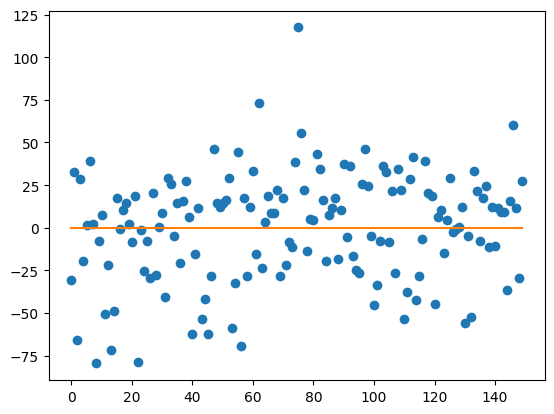

In [140]:
df_sorted = df.sort_values("Glucose")
df_sorted["Glucose"][range(50,100)]
x = np.array(df["Glucose"][:150])
#x
y = np.array(df["BloodPressure"][:30])
z = np.array(df["Insulin"][:30])
a = np.array(df["DiabetesPedigreeFunction"][:30])
len(x)
len(y)
#plt.plot(a,z,'o')
y_av = sum(y)/len(y)
x_av = sum(x)/len(x)
z_av = sum(z)/len(z)
a_av = sum(a)/len(a)

resid_list =  []
final_list = []
for i in range(0,len(x)):
 resid_list.append(x_av - x[i]) 
resid_list
plt.plot(resid_list,'o')
#plt.plot(x)
zero_array = np.zeros(150)
plt.plot(zero_array)

In [129]:
len(x)

30